### Data Science Assignment

**Objective :** To explore the relationship between trader performance and market 
sentiment, uncover hidden patterns, and deliver insights that can driv  smarter trading
strategies.


In [1]:
# Importing Essential Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading Data-sets
sentiment_data = pd.read_csv("fear_greed_index.csv")
historical_data = pd.read_csv("historical_data.csv")

In [3]:
# Exploring datasets
sentiment_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [5]:
# Preprocessing Data

# Checking if there are any missing values in the datasets

sentiment_data.isna().sum()

timestamp         0
value             0
classification    0
date              0
dtype: int64

In [6]:
historical_data.isna().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Here we can see that, there are no any missing values present in the datasets.

In [7]:
# Converting the date column (which is currently a string) into a proper datetime object.

sentiment_data['date'] = pd.to_datetime(sentiment_data['date'])
sentiment_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
# Converting the time column in historical data (likely a timestamp of when a trade happened) to datetime format.
historical_data['Timestamp IST'] = pd.to_datetime(
    historical_data['Timestamp IST'], 
    format='%d-%m-%Y %H:%M'
)
# Extracting just the date (year-month-day) from the full timestamp.
historical_data['date'] = historical_data['Timestamp IST'].dt.date


historical_data['date'] = pd.to_datetime(historical_data['date'])
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [9]:
# Merge datasets on date
merged_df = pd.merge(historical_data, sentiment_data, on='date', how='left')
merged_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,1.733117e+09,80.0,Extreme Greed


In [10]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  datetime64[ns]
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  float64       
 14  Trad

In [11]:
# Ckecking for missing values in Merged dataset
merged_df.isna().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
timestamp           6
value               6
classification      6
dtype: int64

Here we can see that there are misiing values in the data, but we have very few rows with missing data, so we can drop missing values.

In [12]:
merged_df.shape

(211224, 20)

In [13]:
# Eliminating rows with Missing Values
merged_df = merged_df.dropna()
merged_df.shape

(211218, 20)

In [14]:
merged_df.isna().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
date                0
timestamp           0
value               0
classification      0
dtype: int64

In [15]:
# Computing correlation of 'value' (market sentiment) with all other numeric columns
value_correlations = merged_df.corr(numeric_only=True)['value'].sort_values(ascending=False)

value_correlations


value              1.000000
Size Tokens        0.023080
Crossed            0.020438
Closed PnL         0.008121
Trade ID          -0.006574
Fee               -0.026877
Execution Price   -0.027558
Size USD          -0.029843
Start Position    -0.049619
Timestamp         -0.377565
timestamp         -0.478040
Order ID          -0.561758
Name: value, dtype: float64

In [16]:
# Group by Coin and compute correlation between 'value' and 'Closed PnL'
coin_correlations = (
    merged_df.groupby('Coin')[['value', 'Closed PnL']]
    .corr()
    .unstack()
    .iloc[:, 1]  # Correlation between value and Closed PnL
    .sort_values(ascending=False)
)

print("Top 10 Coins by Correlation with Sentiment:")
print(coin_correlations.head(10))


Top 10 Coins by Correlation with Sentiment:
Coin
@63         1.000000
CYBER       1.000000
PEOPLE      1.000000
NEIROETH    1.000000
RLB         0.925421
ETC         0.822672
LOOM        0.703218
UNIBOT      0.683046
@124        0.654161
kNEIRO      0.625646
Name: (value, Closed PnL), dtype: float64


### **Visualizing the Data**

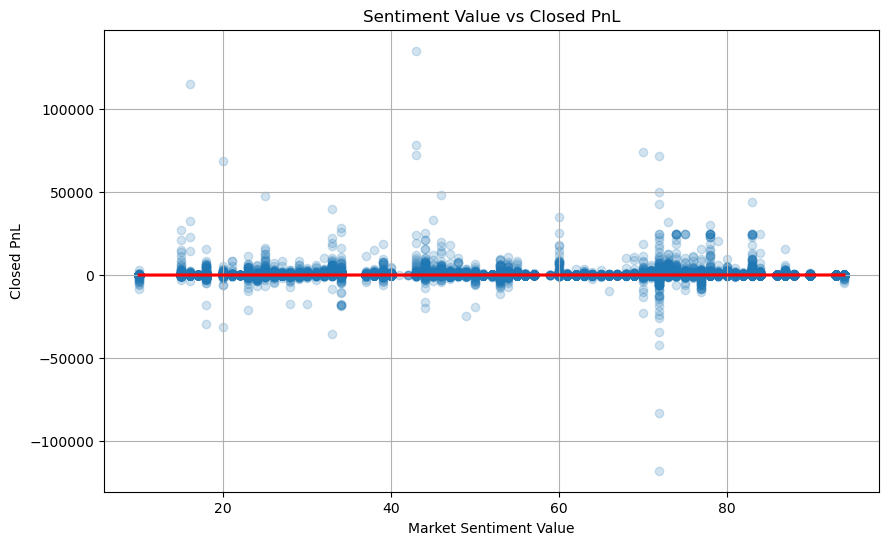

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='value', y='Closed PnL', scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
plt.title('Sentiment Value vs Closed PnL')
plt.xlabel('Market Sentiment Value')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.show()


### 📈 1. Sentiment Value vs Closed PnL (Scatter Plot with Regression Line)
**🧠 What It Shows:**
- Each dot represents a single trade.
- X-axis: Market Sentiment Value (0 = Extreme Fear, 100 = Extreme Greed)
- Y-axis: Closed PnL (Profit/Loss from that trade)
- The red line is a linear regression fit.

**📊 Insights:**
- There's no clear trend — trades happen across all sentiment values with varying PnL.
- Slight clustering around the center (sentiment ~40–60).
- Many extreme PnL values (both gains and losses) are scattered evenly, indicating:
- Low linear correlation
- Sentiment alone may not determine profitability
- Confirmed by the very low Pearson correlation (~0.008).

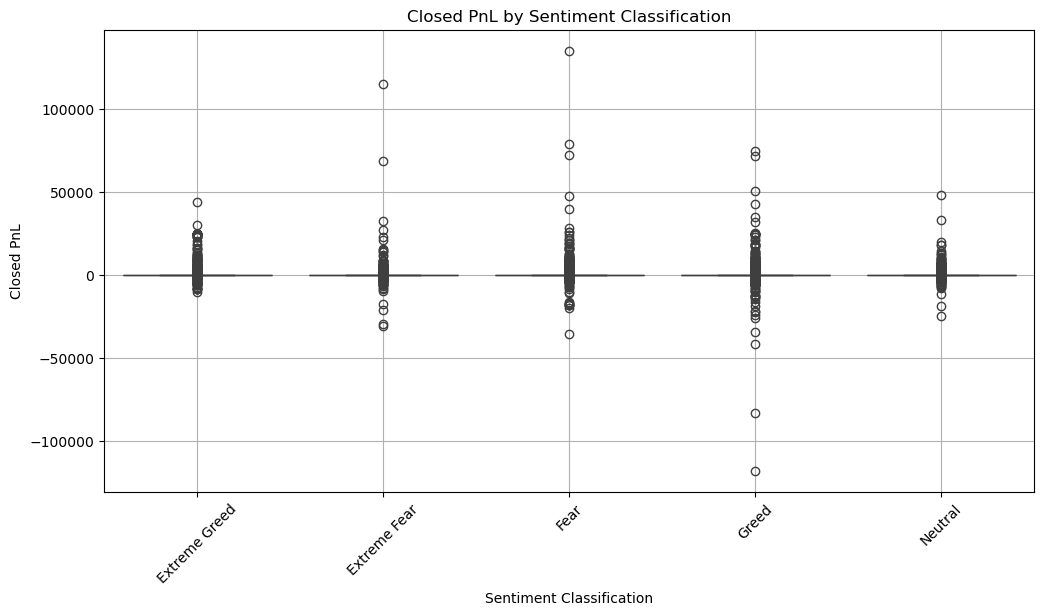

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='classification', y='Closed PnL')
plt.title('Closed PnL by Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Closed PnL')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### 2. Closed PnL by Sentiment Classification (Box Plot)
**🧠 What It Shows:**
- Groups trades by sentiment class (e.g., Extreme Fear, Fear, Greed)
- Shows distribution of Closed PnL within each group

**📊 Insights:**
- Median PnL is close to zero in all sentiment classes.
- Wide range and many outliers — profits/losses vary a lot regardless of sentiment.
- Suggests sentiment class does not significantly affect average trade profitability, though variability exists.

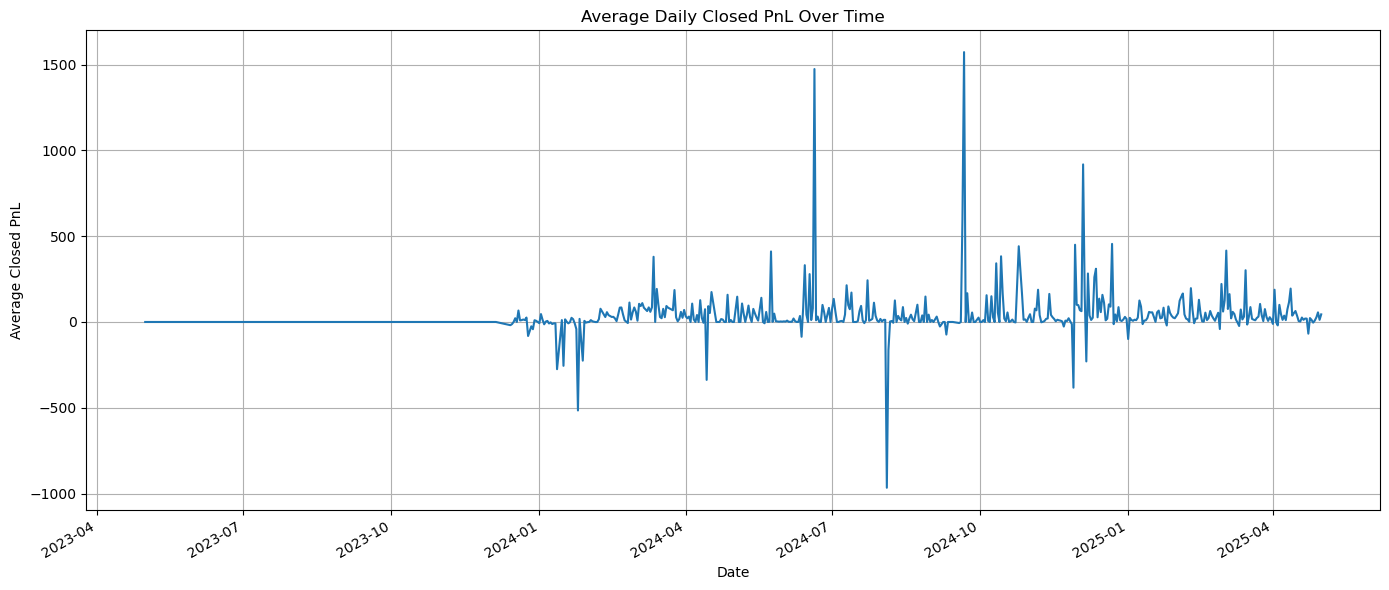

In [19]:
avg_pnl_by_date = merged_df.groupby('date')['Closed PnL'].mean()

plt.figure(figsize=(14, 6))
avg_pnl_by_date.plot()
plt.title('Average Daily Closed PnL Over Time')
plt.xlabel('Date')
plt.ylabel('Average Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.show()


### 📈 3. Average Daily Closed PnL Over Time (Line Plot)
**🧠 What It Shows:**
- Date-wise average of all Closed PnL values per day.

**📊 Insights:**
- Some sharp spikes and drops — these could be driven by high-volume trades or big market events.
- The trend appears mostly flat, suggesting:
- No persistent gain/loss pattern over time
- Traders don’t consistently perform better or worse during any specific period

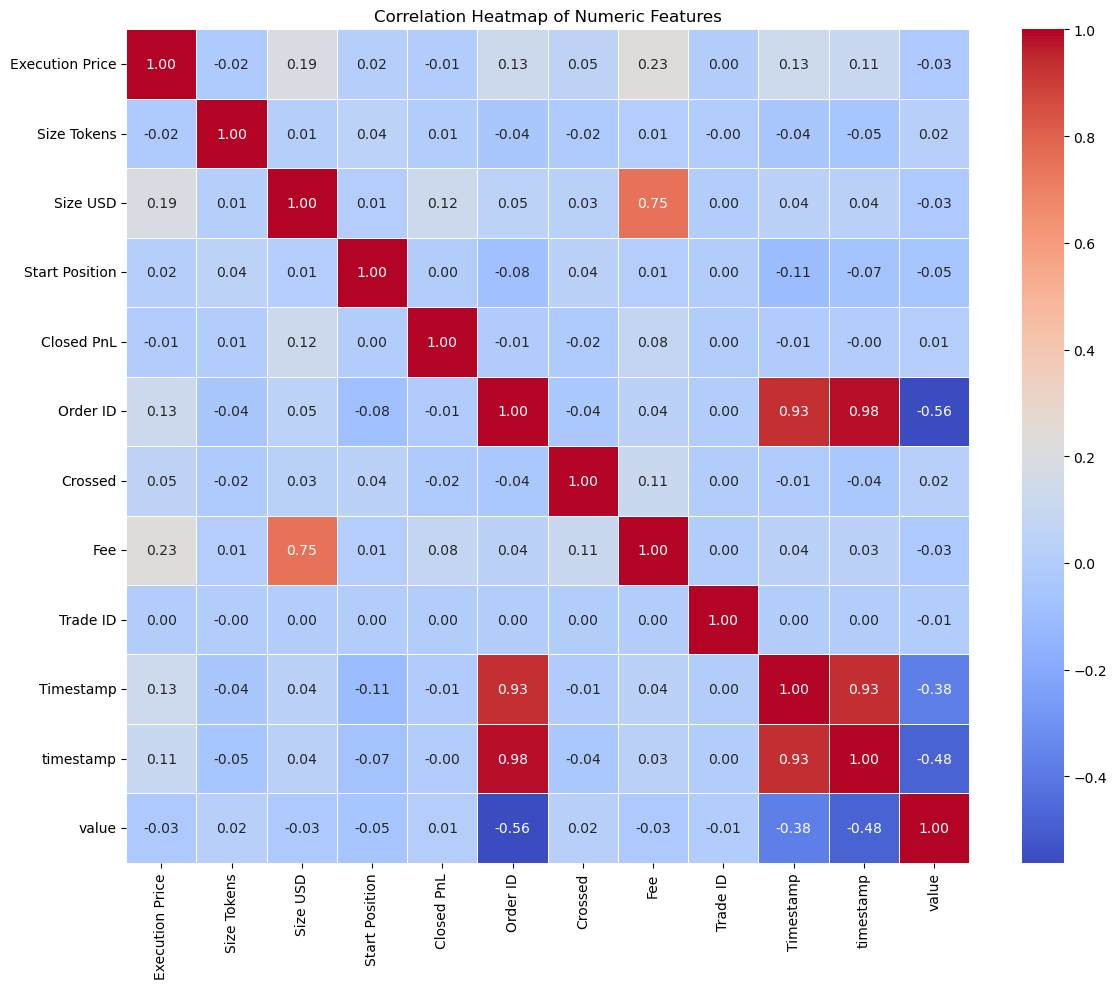

In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()


### 4. Correlation Heatmap of Numeric Features
**🧠 What It Shows:**
- Pairwise correlations of all numeric features including sentiment (value) and PnL.

**📊 Insights:**
- value (market sentiment) has:
- Weak positive correlation with classification (expected — derived from it)
- Very weak positive correlation with Closed PnL (~0.008)
- Most other features show low or no significant correlation with sentiment or each other.
- Size USD and Fee show moderate positive correlation (logical since larger trades incur higher fees).

### Outlier Detection

In [21]:
# Using IQR method to detect outliers in 'Closed PnL'

# Step 1: Calculate Q1, Q3, and IQR
Q1 = merged_df['Closed PnL'].quantile(0.25)
Q3 = merged_df['Closed PnL'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers_df = merged_df[(merged_df['Closed PnL'] < lower_bound) | (merged_df['Closed PnL'] > upper_bound)]
non_outliers_df = merged_df[(merged_df['Closed PnL'] >= lower_bound) & (merged_df['Closed PnL'] <= upper_bound)]

# Step 4: Basic stats
outlier_stats = {
    'Total Records': len(merged_df),
    'Outliers Detected': len(outliers_df),
    'Non-Outliers': len(non_outliers_df),
    'Outlier Percentage': round((len(outliers_df) / len(merged_df)) * 100, 2)
}

outlier_stats


{'Total Records': 211218,
 'Outliers Detected': 48942,
 'Non-Outliers': 162276,
 'Outlier Percentage': 23.17}